# 1장. 헬로우 파이썬

### 1. Class

In [ ]:
# 클래스의 구조
class 클래스이름:
    def __init__(slef, 인수, ...):  # 생성자 : 클래스의 인스턴스가 만들어질 때 한번만 사용
        ...
    def 메서드이름1(self, 인수, ...):  # 메서드1 :  메서드의 첫번재 인수는 자기자신을 가리키는 self를 쓰는 것이 특징
        ...
    def 메서드이름2(self, 인수, ...):  # 메서드2
        ...

In [1]:
# 클래스 예시
class Man:
    def __init__(self, name):
        self.name = name
        print("Initialized!")

    def hello(self):
        print("Hello" + self.name + "!")

    def goodbye(self):
        print("Good-bye" + self.name + "!")

m = Man("David")
m.hello()
m.goodbye()

Initialized!
HelloDavid!
Good-byeDavid!


### 2.Numpy

In [7]:
# 넘파이 가져오기
import numpy as np

# 넘파이 배열 생성하기
x = np.array([1.0, 2.0, 3.0])
print(x)
print(type(x))

# 넘파이의 산술연산
x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 4.0, 6.0])
print(x + y)  # 원소별 덧셈
print(x - y)  # 원소별 뺄셈
print(x * y)  # 원소별 곱셈
print(x / y)  # 원소별 나눗셈

# 여기서 주의할 점은 배열 x와 배열 y의 원소 수가 같다는 것이다.
# 원소의 수가 같다면 산술 연산은 각 원소에 대해서 이뤄진다.

# 넘파이 배열과 수치하나(스칼라) 간의 연산은 브로드 캐스트라고 한다.
print(x / 2.0)

[1. 2. 3.]
<class 'numpy.ndarray'>
[3. 6. 9.]
[-1. -2. -3.]
[ 2.  8. 18.]
[0.5 0.5 0.5]
[0.5 1.  1.5]


In [10]:
# 넘파이의 N차원 배열
A = np.array([[1, 2],
              [3, 4]])
print(A)
print(A.shape)
print(A.dtype)

B = np.array([[3, 0],
              [0, 6]])
print(A+B)
print(A*B)

# 형상이 같은 행렬끼리 연산하면 대응하는 원소별로 계산된다.
# 형상이 다른 행렬끼리 계산이되는 경우 브로드캐스트 기능이 작동한다.
print(A * 10)

# 브로드캐스트
A = np.array([[1, 2],
              [3, 4]])
B = np.array([10, 20])
print(A * B)


[[1 2]
 [3 4]]
(2, 2)
int64
[[ 4  2]
 [ 3 10]]
[[ 3  0]
 [ 0 24]]
[[10 20]
 [30 40]]


In [16]:
# 원소접근
X = np.array([[51, 55],
              [14, 19],
              [0, 4]])
print(X)
print(X[0])
print(X[0][1])

# 반복문으로 각 원소에 접근
for row in X:
    print(row)

# X를 1차원 배열로 변환(평탄화)
X = X.flatten()
print(X)

# 인덱스가 0, 2, 4인 원소 얻기
print(X[np.array([0, 2, 4])])

[[51 55]
 [14 19]
 [ 0  4]]
[51 55]
55
[51 55]
[14 19]
[0 4]
[51 55 14 19  0  4]
[51 14  0]


### 3.matplotlib

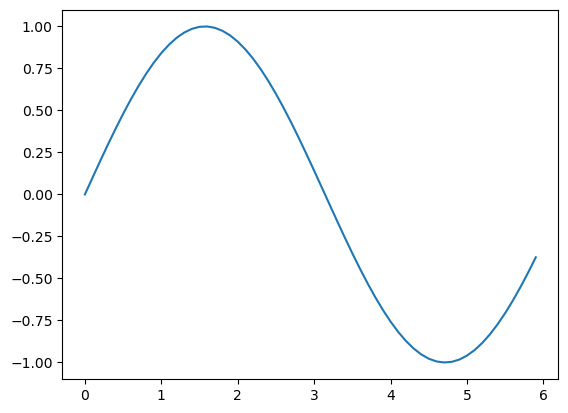

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# sin 함수 그리기
x = np.arange(0, 6, 0.1)  # 0에서 6까지 0.1 간격으로 생성
y = np.sin(x)

plt.plot(x, y)
plt.show()

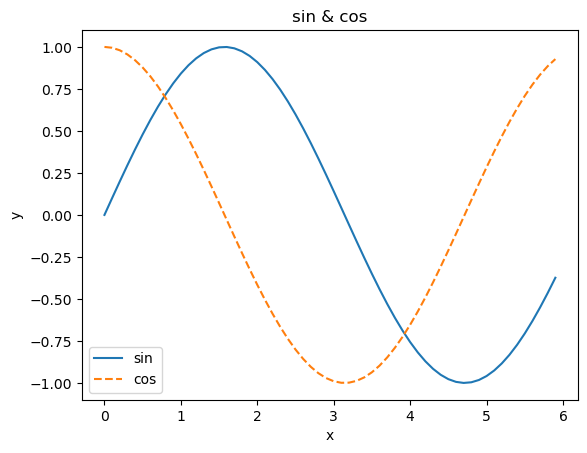

In [20]:
# cos 함수 그리기
x = np.arange(0, 6, 0.1)  # 0에서 6까지 0.1 간격으로 생성
y1 = np.sin(x) 
y2 = np.cos(x)

plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle='--', label='cos')  # cos 함수는 점선으로 그리기
plt.xlabel('x')  # x축 이름
plt.ylabel('y')  # y축 이름
plt.title('sin & cos')  # 그래프 제목
plt.legend()  # 범례
plt.show()

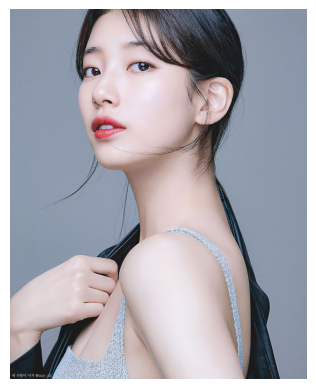

In [22]:
# 이미지 표시하기
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('data/suzy.jpeg')  # 이미지 읽어오기

plt.imshow(img)
plt.axis("off")  # 눈금 지우기
plt.show()

# 2장. 퍼셉트론

In [1]:
# and 함수
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

In [2]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [3]:
# numpy로 가중치와 편향 도입
import numpy as np
x = np.array([0,1])        # 입력
w = np.array([0.5, 0.5])   # 가중치
b = -0.7                   # 편향
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b, "   # 대략 -0.2 (부동소수점 수에 의한 연산 오차)")

[0.  0.5]
0.5
-0.19999999999999996    # 대략 -0.2 (부동소수점 수에 의한 연산 오차)


In [4]:
# 가중치와 편향 구현하기
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [6]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
# XOR 게이트 구현하기
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [8]:
print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


# 신경망

## 활성화 함수

### 계단 함수

In [9]:
# 계단 함수
def step_function(x):
    if x > 0 :
        return 1
    else :
        return 0
    
# 넘파이 배열도 지원하도록 만든 계단 함수
def step_function2(x):
    y = x > 0
    return y.astype(np.int)

In [10]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)
# 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성됨
# 그런데 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수이다 그래서 배열 y의 원소릴 int형으로 바꿈

y = y.astype(np.int)   #.astype() : 넘파이 배열의 자료형을 변환할 때 쓰는 메서드
print(y)

[False  True  True]
[0 1 1]


C:\Users\AI\AppData\Local\Temp\ipykernel_28076\3948436011.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)   #.astype() : 넘파이 배열의 자료형을 변환할 때 쓰는 메서드


C:\Users\AI\AppData\Local\Temp\ipykernel_28076\3570056502.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


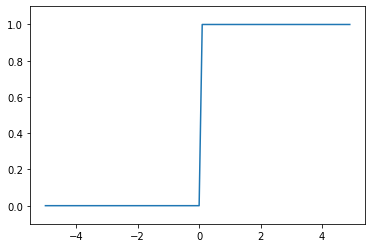

In [11]:
# 계단함수 그래프 그리기
import numpy as np
import matplotlib.pylab as plt

def step_function3(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function3(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)   # y축의 범위 지정
plt.show()

### 시그모이드 함수

In [12]:
# 지수함수
import math

# 2의 5제곱 pow
pow = math.pow(2,5)
print("pow 결과 :", pow)

# 2의 제곱근 sqrt
sqrt = math.sqrt(2)
print("sqrt 결과 :", sqrt)

# e의 2제곱
exp = math.exp(2)
print("exp 결과 :", exp)

pow 결과 : 32.0
sqrt 결과 : 1.4142135623730951
exp 결과 : 7.38905609893065


In [13]:
def exp_test(x):
    num1 = 1/1+np.exp(-x)
    num2 = 1/1+(1/np.exp(x))
    print(num1)
    print(num2)
    return num1 == num2

exp_test(2.0)

1.1353352832366128
1.1353352832366128


True

In [14]:
# 로그함수
import math

# log 값을 얻으려고 math라이브러리 log() 함수를 사용
math.log(2,4)   # 밑이 4이고 진수가 2인 로그  !!! 로그 쓰는거랑 순서가 반대임에 주의하자

0.5

In [15]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

# 이 함수가 넘파이 배열도 훌륭히 처리해줄 수 있는 비밀은 넘파이의 브로드캐스트에 있다
# 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것

array([0.26894142, 0.73105858, 0.88079708])

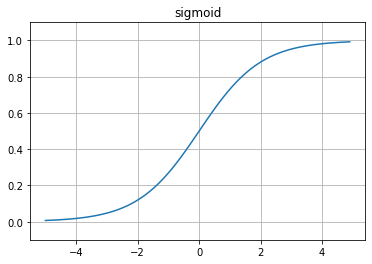

In [17]:
# 시그모이드 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.grid("on")
plt.title("sigmoid")
plt.show()

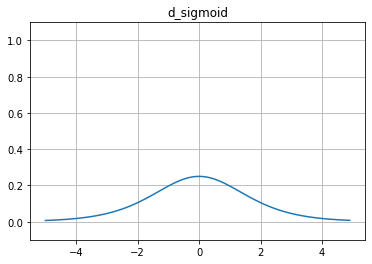

In [18]:
# (미분)시그모이드
def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# (미분)시그모이드 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = d_sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.grid("on")
plt.title("d_sigmoid")
plt.show()

### 렐루 함수

In [19]:
# 렐루 함수
def relu(x):
    return np.maximum(0, x)

# np.maximum함수는 두 입력 중 큰 값을 선택해 반환하는 함수

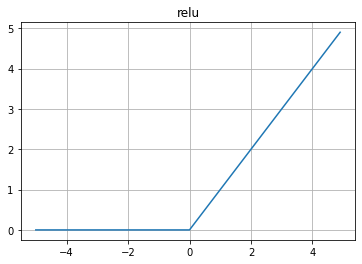

In [20]:
# 렐루 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.grid("on")
plt.title("relu")
plt.show()

## 다차원 배열의 계산

In [21]:
# 1차원 배열
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))   # 차원 반환
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [22]:
# 2차원 배여
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [23]:
# 2x2 행렬곱
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [24]:
# 2x3, 3x2 행렬곱 
A = np.array([[1,2,3], 
              [4,5,6]])
print(A.shape)
B = np.array([[1,2],
              [3,4],
              [5,6]])
print(B.shape)
print(np.dot(A, B))
print(np.dot(B,A))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


In [25]:
# 신경망에서의 행렬 곱
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5],
              [2, 4, 6]])
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


## 3층 신경망 구현

In [26]:
# 입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])

W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])

B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)    
print(W1.shape)   
print(B1.shape)   

A1 = np.dot(X,W1)+B1

(2,)
(2, 3)
(3,)


In [27]:
# 1층에서 활성화 함수 동작
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [28]:
# 1층에서 2층으로 신호 전달
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])

B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [29]:
# 2층에서 출력층으로 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)
Y = A3
Y

array([0.21682708, 0.49627909])

### 구현정리

In [30]:
#가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
def init_network():  
    network = {}  #이 딕셔너리변수에는 각 층에 필요한 매개변수(가중치와 편향)를 저장합니다.
                                                    
                                                   # 입력층은 2x1 행렬
    network['W1'] = np.array([[0.1, 0.3, 0.5],     # 1층은 2x3 행렬
                              [0.2, 0.4, 0.8]])    # -> 1x3 행렬
    network['b1'] = np.array([0.1, 0.2, 0.3])
    
    network["W2"] = np.array([[0.1, 0.4],          # 2층 입력은 직전 층의 출력 1x3행렬
                              [0.2, 0.5],          # 2층은 3x2 행렬
                              [0.3, 0.6]])         # -> 1x2 행렬
    network["b2"] = np.array([0.1, 0.2])
    
    network["W3"] = np.array([[0.1, 0.3],          # 3층 입력은 직전 층의 출력 1x2 행렬
                              [0.2, 0.4]])         # 3층은 2x2 행렬
    network["b3"] = np.array([0.1, 0.2])           # -> 1x2 행렬
    
    return network


#입력 신호를 출력으로 변환하는 처리 과정을 모두 구현
def forward(network, x):   #순전파
    W1, W2, W3 = network["W1"], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    print("1층 W*X :",np.dot(x,W1))
    print("1층 W*X+B :",a1)
    z1 = sigmoid(a1)
    print("1층 sigmoid :",z1)
    a2 = np.dot(z1, W2) + b2
    print("-"*50)
    print("2층 W*X :",np.dot(z1,W2))
    print("2층 W*X+B :",a2)
    z2 = sigmoid(a2)
    print("2층 sigmoid :",z2)    
    print("-"*50)
    a3 = np.dot(z2, W3) + b3
    print("3층 W*X :",np.dot(z2,W3))
    print("3층 W*X+B :",a3)
    y = identity_function(a3)
    
    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print("출력값",y)

1층 W*X : [0.2 0.5 0.9]
1층 W*X+B : [0.3 0.7 1.2]
1층 sigmoid : [0.57444252 0.66818777 0.76852478]
--------------------------------------------------
2층 W*X : [0.42163924 1.02498576]
2층 W*X+B : [0.52163924 1.22498576]
2층 sigmoid : [0.627531   0.77293976]
--------------------------------------------------
3층 W*X : [0.21734105 0.4974352 ]
3층 W*X+B : [0.31734105 0.6974352 ]
출력값 [0.31734105 0.6974352 ]


## 출력층 설계

- 항등함수 : 입력과 출력이 항상 같다
- 소프트맥스 : 분자는 입력신호 a의 지수함수 / 분모는 모든 입력신호의 지수함수의 합  
  소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받는다

In [31]:
# 소프트맥스 함수 구현
a = np.array([0.3, 2.0, 4.0])
exp_a = np.exp(a)   #지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a)   #지수함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881  7.3890561  54.59815003]
63.33706493965089
[0.0213123  0.11666243 0.86202526]


In [32]:
# 소프트맥스 함수
def softmax(a):
    exp_a = np.ex(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [33]:
a = np.array([1010, 1000, 990])
b = np.exp(a) / np.sum(np.exp(a))   #소프트맥스 함수의 계산
print(b)

c = np.max(a)   #C = 1010 (최대값)
print(a-c)

d = np.exp(a-c) / np.sum(np.exp(a-c))
print(d)

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\AI\AppData\Local\Temp\ipykernel_28076\137734663.py:2: RuntimeWarning: overflow encountered in exp
  b = np.exp(a) / np.sum(np.exp(a))   #소프트맥스 함수의 계산
C:\Users\AI\AppData\Local\Temp\ipykernel_28076\137734663.py:2: RuntimeWarning: invalid value encountered in true_divide
  b = np.exp(a) / np.sum(np.exp(a))   #소프트맥스 함수의 계산


In [34]:
# 개선된 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수의 특징

- 소프트맥스 함수의 출력은 0 ~ 1.0 사이의 실수
- 소프트맥스 함수 출력의 총합은 1  <- 이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석 가능  
  즉, 소프트맥스 활성화 함수로 문제를 확률적(통계적)으로 대응할 수 있게 되는 것

## [실습]손글씨 숫자 인식

In [35]:
!pip install tensorflow

In [36]:
import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [37]:
from PIL import Image
import numpy as np

def img_show(img):
    #Image.fromarray : 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환
    pil_img = Image.fromarray(np.uint8(img))  
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 신경망의 추론 처리

- 입력층 뉴런을 784개 <- feature (28x28=784) 이미지 픽셀
- 출력층 뉴런을 10개 <- label 

In [38]:
def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)
    return x_test, t_test

def init_network():
    # with ~ as : 개발자가 실수로 close( ) 를 하지 않아도 자동으로 객체를 close 하게 해준다.
    with open("sample_weight.pkl", 'rb') as f:
        #pickle : 프로그램 실행 중 특정 객체를 파일로 저장하는 기능
        network = mnist.pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    return y

In [39]:
x, t = get_data()   #테스트 피쳐와 라벨 부르기
network = init_network()   #피클 가져오기

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)   #확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:"+str(float(accuracy_cnt)/len(x)))

C:\Users\AI\AppData\Local\Temp\ipykernel_28076\1310896610.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Accuracy:0.9207


### 배치 처리

In [40]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(y[0])

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)
7.186179e-05


In [41]:
# 배치처리 구현

x, t = get_data()
network = init_network()

batch_size = 100   #배치크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9207


C:\Users\AI\AppData\Local\Temp\ipykernel_28076\1310896610.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


# 신경망 학습

- 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값으 자동을 획득하는 것 
- 손실함수

## 손실함수

In [42]:
# 오차제곱합(SSE)
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [44]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))   #맞춘거

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))   #틀린거

0.09750000000000003
0.5975


In [45]:
# 평균제곱오차(MSE)
def mean_squares_error(y,t):
    return ((1/len(y)) * np.sum((y-t)**2))

In [46]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squares_error(np.array(y), np.array(t)))   #맞춘거

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squares_error(np.array(y), np.array(t)))   #틀린거

0.019500000000000007
0.11950000000000001


In [47]:
# 교차 엔트로피 오차(CEE)
def cross_entropy_error(y,t,n):
    return -np.sum(t * np.log(y+delta))

# 분류니까 0이 나올 수 있음
# 그런데 log 0은 무한대 그래서 로그할 땐 0이 되지 않도록 무언가의 값을 더해준다. (충분히 작은 값을)

In [48]:
# 교차 엔트로피 오차(CEE)
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

# X가 특정 값을 가질 확률이 1이 되는 경우에 엔트로피는 최솟값이 된다.
# 이 때의 엔트로피 값은 0이 된다. 즉 불확실성이 감소할수록 엔트로피 값은 작아진다.

In [49]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))   #맞춘거

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))   #틀린거

0.510825457099338
2.302584092994546


## [실습]미니배치 학습

In [51]:
# 미니배치 만들기

(x_train, t_train), (x_test, t_test) = mnist.load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
#np.random.choice(범위, 원하는갯수) : 지정한 범위의 수 중에서 무작위로 원하는 개수만큼 꺼낼 수 있음
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7))

## 원 핫 인코딩이 아닐 때 ##
# def cross_entropy_error(y, t):
#     if y.ndim == 1:
#         t = t.reshape(1, t.size)
#         y = y.reshape(1, y.size)
        
#     batch_size = y.shape[0]
#     return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


(60000, 784)
(60000, 10)


## 미분

In [59]:
# 미분
def numerical_diff(f, x):
    h = 1e-4  # 0.0001  10**-4
    return (f(x+h) - f(x-h)) / (2*h)

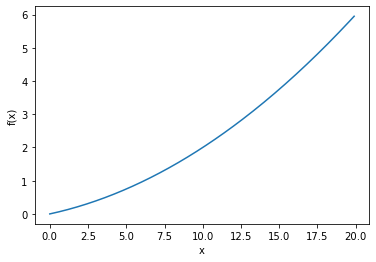

In [60]:
# 수치미분
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)   # 0에서 20까지 0.1 간격의 배열 x를  만든다 (20은 미포함)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [61]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


## 편미분

In [63]:
# 편미분
def function_2(x):
    return x[0]**2 + x[1]**2

## 기울기

In [64]:
# 기울기
def numerical_gradient(f, x):
    h = 1e-4   #0.0001
    grad = np.zeros_like(x)   # x와 형상이 같은 배열을 생성
    
    for i in range(x.size):
        tmp_val = x[i]
        
        #f(x+h) 계산
        x[i] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp_val   #값 복원
        
    return grad

In [67]:
# 실제 기울기 계산
print(numerical_gradient(function_2, np.array([3.0, 4.0])))   #좌표 (3,4)의 기울기
print(numerical_gradient(function_2, np.array([0.0, 2.0])))   #좌표 (0,2)의 기울기
print(numerical_gradient(function_2, np.array([3.0, 0.0])))   #좌표 (3,0)의 기울기

[6. 8.]
[0. 4.]
[6. 0.]


## 경사하강법


In [68]:
# 경사하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(setp_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

# CNN
- MLP (Mulit Layer Peceptron)  
MLP은 층이 깊어지고 뉴런 수가 많아지면 가중치 수가 급격히 늘어난다.  
MLP 신경망을 이미지 처리에 사용한다면 이미지의 어떤 특정 패턴이 존재하는 위치에 민감하게 동작하며  
패턴의 위치에 종속적인 결과를 얻는다.  
위치기반으로 학습을 해서 위치가 조금만 달라져도 다른 값으로 파악  
이미지 크기가 조금만 다라져도 다른 값으로 파악  
크기나 위치로 학습해서 이미지 모양은 학습 불가능  
즉, MLP로 특정 이미지를 인식시키려면 그 것이 크기와 이미지에서 위치를 맞춰야한다.  

- CNN   
이미지의 특징을 추출해서 학습을 시켜보자  
Conv, Pool, Dense 층 사용해서 모델 구조 설계  
Conv은 특징을 찾는 역할 
Pool은 특징이 아닌 부분 삭제   
특징만 남은 것을 Dense층에 넣어서 판단해줘  